#Intro
In this notebook, one will be using the IMDB and machine learning models to judge if the writer had a negative feeling or a positive feeling about that movie.

This can reveal insights into general opinions about the gender of the movie and even the time it was published.

In [1]:
%pip install Jupyter

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\Gustavo Fortunato\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import zipfile

#from google.colab import drive
#drive.mount('/content/drive')

#dataset is found here https://www.kaggle.com/datasets/luisfredgs/imdb-ptbr/download?datasetVersionNumber=1
#data= pd.read_csv('/content/drive/MyDrive/imdb-reviews-pt-br.csv')
data = pd.read_csv('D:/Google drive/imdb-reviews-pt-br.csv')
data.head()



,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


#Spliting data and defining a baseline

#Using  NLP

One can't use machine learning models like regressions, single vector machines, and decision trees to train, test and validate in this case. The data here is string-based date. This kind of data needs to be converted to numbers and then a model can train, tested, and validated. That's the main reason for using NLP-based models. One can process the natural language, aka human language into a machine-readable language.

## Transforming the data

In [3]:
data.sentiment.value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

The data is balanced.

In [4]:
data['new_sentiment'] = data['sentiment'].replace(['neg', 'pos'], [0,1])
data.new_sentiment

0        0
1        0
2        0
3        0
4        0
        ..
49454    1
49455    1
49456    1
49457    1
49458    1
Name: new_sentiment, Length: 49459, dtype: int64

A simple numeric convertion.

The NLP will build a list of all the different string counts in each data point. This will create a vector, based on the presence or absence of the words. In the column index of the dataset, one will have each unique word. This process is called bag of words.

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

text = ['I watched a good movie', 'I watched a bad movie']

vectorizer = CountVectorizer(lowercase=False)
bag_of_words = vectorizer.fit_transform(text)

names = vectorizer.get_feature_names_out()
bag_of_words = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=names)

bag_of_words

,bad,good,movie,watched
0,0,1,1,1
1,1,0,1,1


In [6]:
vectorizer = CountVectorizer(lowercase=False)
bag_of_words = vectorizer.fit_transform(data.text_pt)
bag_of_words.shape

(49459, 156923)

Its a big vector and will need high amouts of computer power. One will use only 50 words and see the results. Later a full count will be done to see its performance and difference. This will define if it was worth to use all features extracted (words).

In [7]:
vectorizer = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vectorizer.fit_transform(data.text_pt)
bag_of_words.shape

(49459, 50)

Only 50 words will be used by the logistic Regression model.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

def text_classifier(data_, data_column, class_column):
  vectorizer = CountVectorizer(lowercase=False, max_features=50)
  bag_of_words = vectorizer.fit_transform(data_[data_column])
  train, test, class_train, class_test = train_test_split(bag_of_words, data_[class_column],
                                                          random_state=42)
  logreg= LogisticRegression()
  logreg.fit(train, class_train)
  return logreg.score(test, class_test)*100


text_classifier(data, 'text_pt', 'new_sentiment')

65.83097452486858

This will be the baseline for one to improve the model.

# Finding the words with the highest significance

In [9]:
%pip install wordcloud
%matplotlib inline
from wordcloud import WordCloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\Gustavo Fortunato\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


63398966


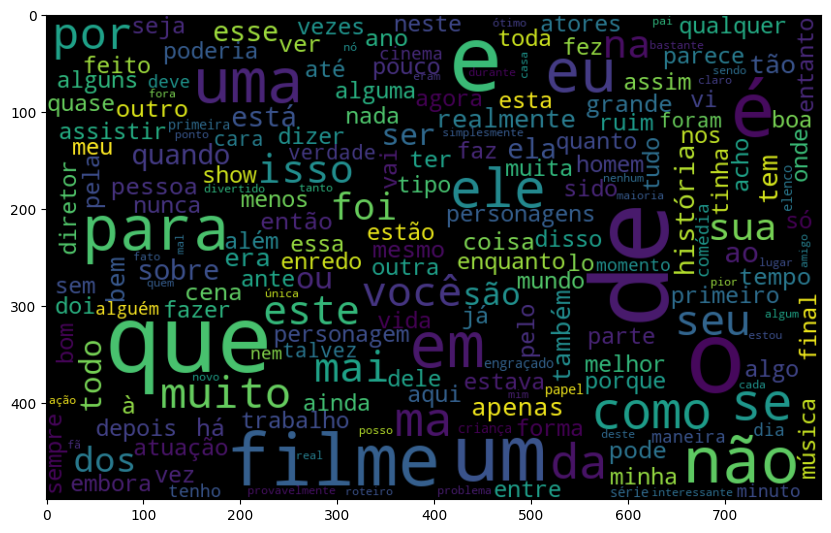

In [10]:
import wordcloud
all_words =''.join([text for text in data.text_pt])
print(len(all_words))
wordcloud = WordCloud(width=800, height=500,
                      max_font_size=110, collocations=False).generate(all_words)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.axis=('off')
plt.imshow(wordcloud, interpolation= 'bilinear')

So, based on the word cloud some words don't mean anything towards the negative or positive critics of movies. Maybe if one divides the data into positive and negative a different result might occur.

In [11]:
def neg_wordcloud(data, data_column):
  neg_data = data.query("sentiment =='neg'")
  all_words =''.join([text for text in neg_data[data_column]])
  wordcloud = WordCloud(width=800, height=500,
                        max_font_size=110, collocations=False).generate(all_words)
  plt.figure(figsize=(10,7))
  plt.axis=('off')
  plt.imshow(wordcloud, interpolation= 'bilinear')

In [12]:
def pos_wordcloud(data, data_column):
  pos_data = data.query("sentiment =='pos'")
  all_words =''.join([text for text in pos_data[data_column]])
  wordcloud = WordCloud(width=800, height=500,
                        max_font_size=110, collocations=False).generate(all_words)
  plt.figure(figsize=(10,7))
  plt.axis=('off')
  plt.imshow(wordcloud, interpolation= 'bilinear')

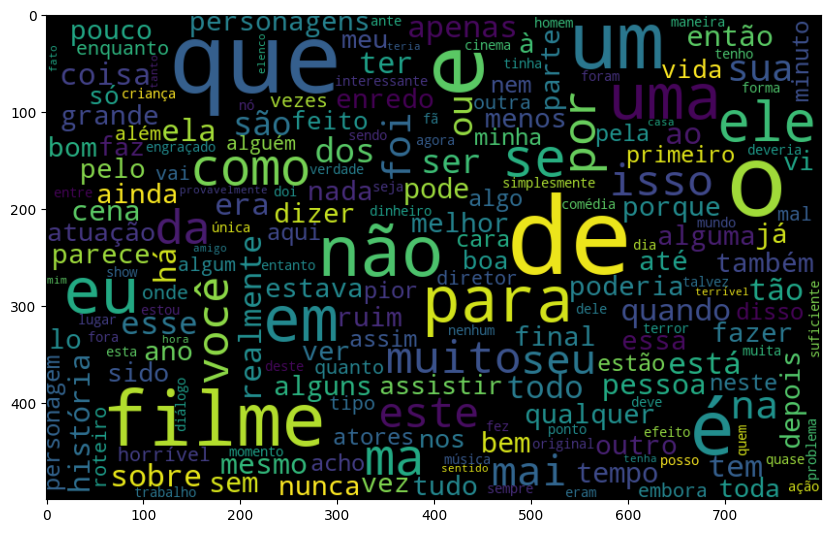

In [13]:
neg_wordcloud(data, 'text_pt')

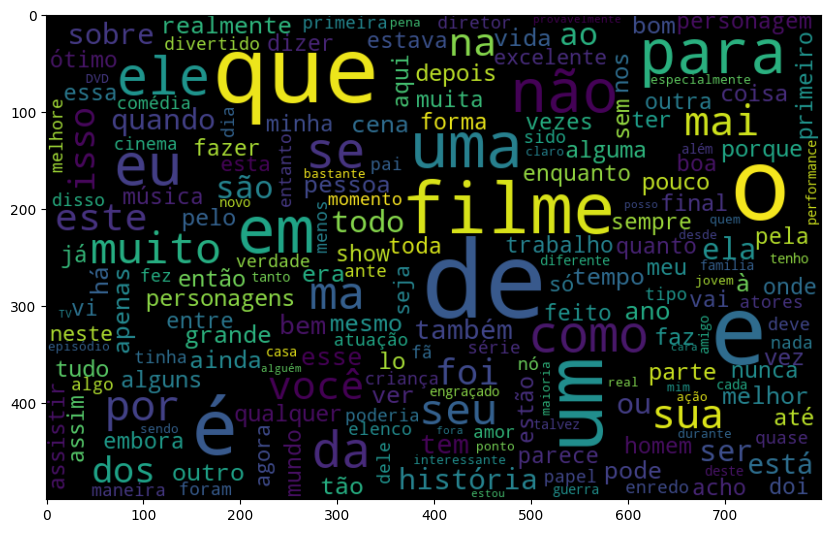

In [14]:
pos_wordcloud(data, 'text_pt')

Well, still it is hard for one to see anything insightful on the word cloud. Some words could tell one about the critics, but doubt remains in one's mind.

A new visualization is needed.

# Tokenizing the data

In [15]:
%pip install nltk
import nltk
nltk.download('all')

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\Gustavo Fortunato\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Gustavo
[nltk_data]    |     Fortunato\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\Gustavo
[nltk_data]    |     Fortunato\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Gustavo
[nltk_data]    |     Fortunato\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data

True

In [16]:
from nltk import tokenize
text = 'Welcome to the NLP world!'
token_space = tokenize.WhitespaceTokenizer()
token_text = token_space.tokenize(text)
print(token_text)

['Welcome', 'to', 'the', 'NLP', 'world!']


In [17]:
token_all_words = token_space.tokenize(all_words)
freq = nltk.FreqDist(token_all_words)
df_freq = pd.DataFrame({'word':list(freq.keys()),
                        'freq':list(freq.values())})
df_freq.nlargest(columns = 'freq', n=10)

,word,freq
20,de,417383
14,que,325058
42,e,299720
3,o,244836
7,um,216380
102,a,210154
45,é,192359
199,em,132770
1,uma,130883
29,não,127894


Those most common and non significant words could be removed from the all words variable.

In [18]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\Gustavo Fortunato\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


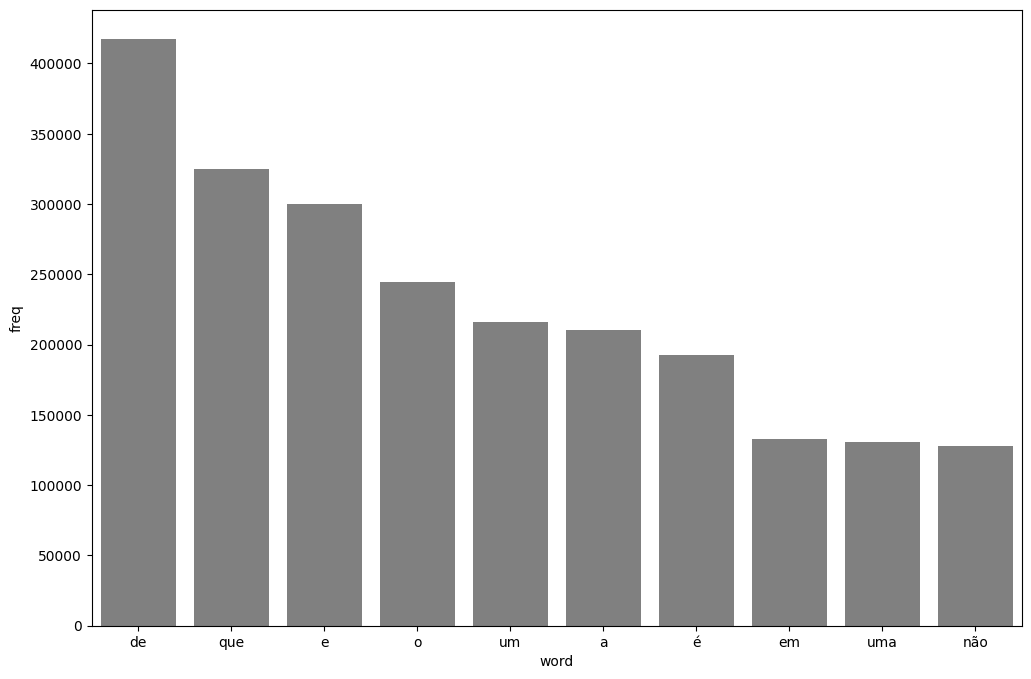

In [19]:
import seaborn as sns
plt.figure(figsize=(12,8))
ax = sns.barplot(data=df_freq.nlargest(columns = 'freq', n=10), x='word', y='freq', color='gray')
ax.setylabel="counts"
plt.show()

Those will be the words that will be removed since they do not affect negative or positive emotions in the movie comments. A function can be done to join all the processes above.

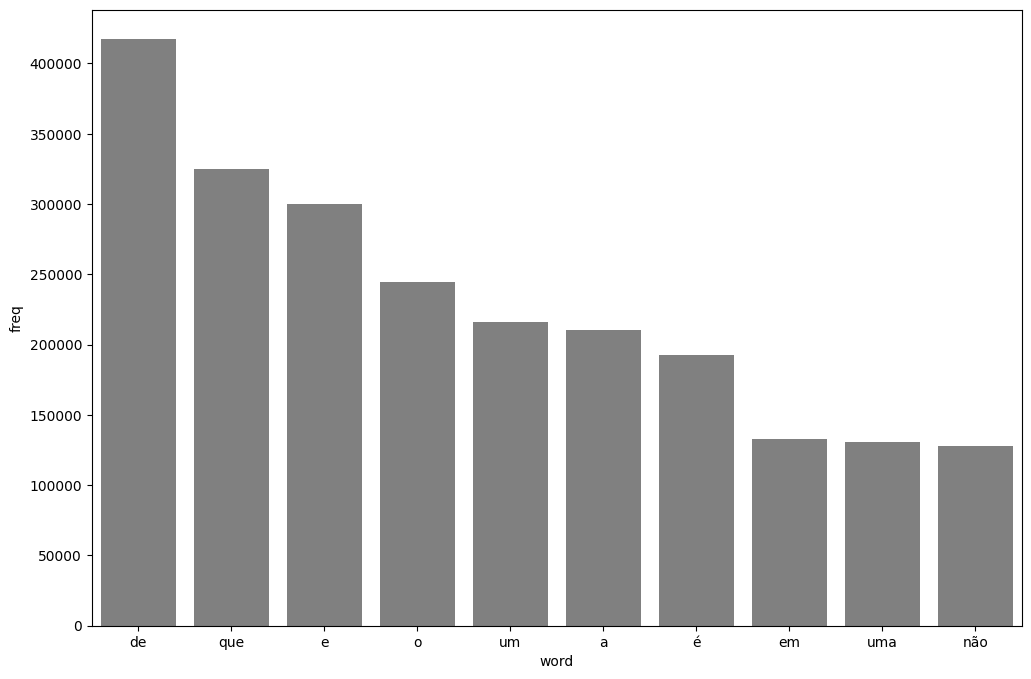

In [20]:
def all_words_view(data_, data_column, n_positions):
  all_words =''.join([text for text in data_[data_column]])

  token_all_words = token_space.tokenize(all_words)
  freq = nltk.FreqDist(token_all_words)
  df_freq = pd.DataFrame({'word':list(freq.keys()),
                          'freq':list(freq.values())})
  df_freq.nlargest(columns = 'freq', n=10)
  df_freq= df_freq.nlargest(columns = 'freq', n=n_positions)

  plt.figure(figsize=(12,8))
  ax = sns.barplot(data=df_freq, x='word', y='freq', color='gray')
  ax.setylabel="counts"
  plt.show()

all_words_view(data, 'text_pt', 10)

# Cleaning the word cloud

Now the words will be removed. Those words are called stopwords as irrelevent words in NLP transformations.

In [21]:
processed_phrases = []
irrelevant_words= nltk.corpus.stopwords.words('portuguese') + ['eu','Eu', 'o','O', 'e','E', 'a','A']
for comment in data['text_pt']:
    # Tokenizing each opinion
    phrases = comment.split()  # Using 'split' method to tokenize based on space
    
    # Creating a new list to store relevant words (removing irrelevant_words)
    new_phrase = [word for word in phrases if word not in irrelevant_words]
    
    # Joining all words into a single string and appending it to 'processed_phrases'
    phrase_joined = ' '.join(new_phrase)  
    processed_phrases.append(phrase_joined)

# Assign the processed phrases to the 'treatment_1' column in the DataFrame
data['treatment_1'] = processed_phrases

data.head()

,id,text_en,text_pt,sentiment,new_sentiment,treatment_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [22]:
text_classifier(data, 'treatment_1', 'new_sentiment')

68.81520420541852

Now the regression result was better than the above result of 65,83, by only cleaning the dataset from the stopwords, one could increase the performance of the model.

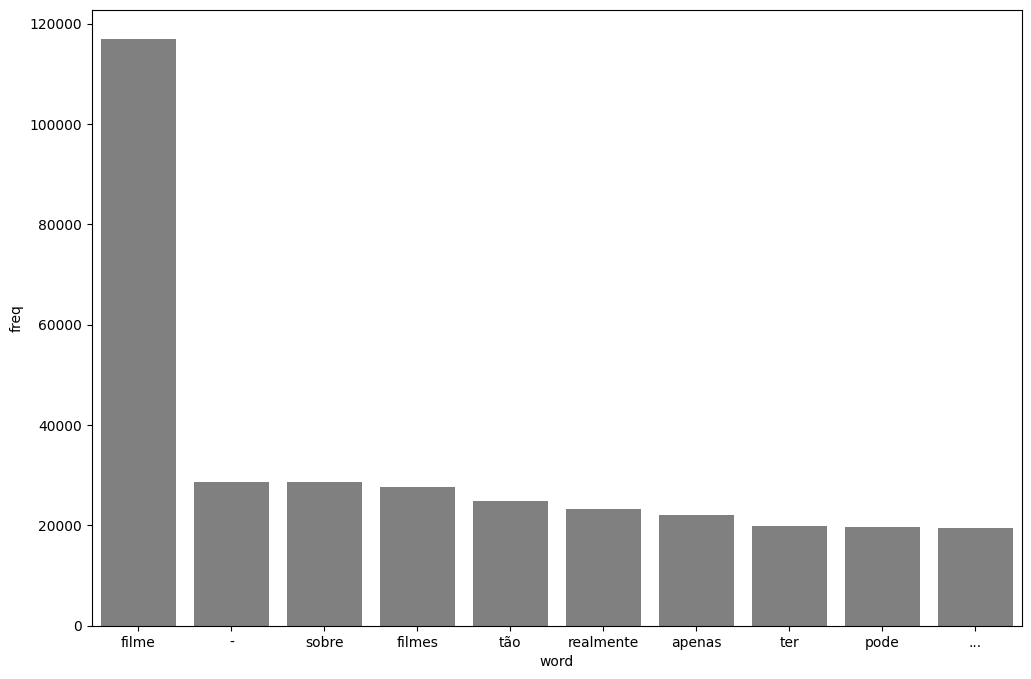

In [23]:
all_words_view(data, 'treatment_1', 10)

Well, another treatment is required here, since other words, not included in the stopwords nltk data, were found.

Remember: The stopwords are pieces of data that will not affect the meaning of the phrases to the machine. Those words are only values that will increase the "confusion" and return inaccurate results.

# Treatment 2: Removing the stopwords
One will remove the stopwords and other text elements with no significance from the dataset.

In [24]:
from nltk import tokenize
from string import punctuation
text_elements = list()

for element in punctuation:
    text_elements.append(element)

text_elements


['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

Those are the text elements that can be found in the dataset and will be removed if they are there.

In [25]:
def remove_elements_from_string(text, elements):
    for element in elements:
        text = text.replace(element, '')
    return text

# Apply the function to the 'treatment_1' column to remove the text elements
data['treatment_2'] = data['treatment_1'].apply(lambda comment: remove_elements_from_string(comment, text_elements))

data.head()

,id,text_en,text_pt,sentiment,new_sentiment,treatment_1,treatment_2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada eles ver...


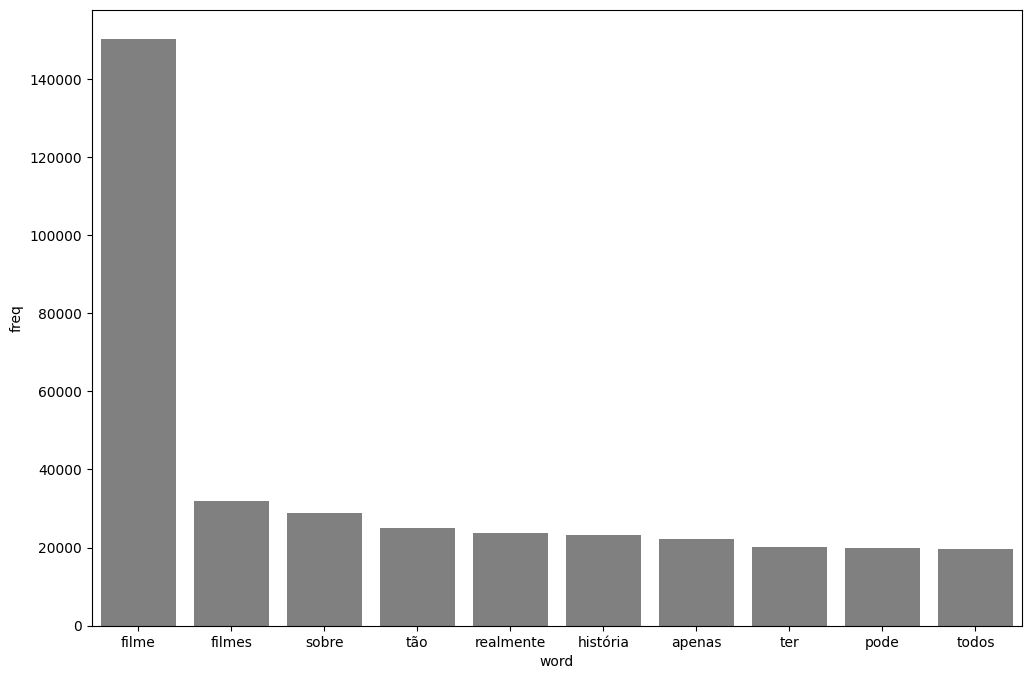

In [26]:
all_words_view(data, 'treatment_2', 10)

Certain words in PT-BR have accentuation and those graphical elements must be removed from the words, but the words must not be removed.

# Treatment 3 and 4: Unidecoding and lowering the cases

In [27]:
#removing word accentuation
%pip install unidecode
import unidecode
data['treatment_3'] = [unidecode.unidecode(text) for text in data['treatment_2'].values]
data['treatment_4'] = data['treatment_3'].str.lower()

acc_baseline = text_classifier(data, 'text_pt', 'new_sentiment')
acc_1= text_classifier(data, 'treatment_1', 'new_sentiment')
acc_2= text_classifier(data, 'treatment_2', 'new_sentiment')
acc_3= text_classifier(data, 'treatment_3', 'new_sentiment')
acc_4= text_classifier(data, 'treatment_4', 'new_sentiment')


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: C:\Users\Gustavo Fortunato\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [28]:
print(f'Baseline ACC = {acc_baseline}\n',
      f'ACC from treatment 1={acc_1}\n',
      f'ACC from treatment 2={acc_2}\n',
      f'ACC from treatment 3={acc_3}\n',
      f'ACC from treatment 4={acc_4}')

Baseline ACC = 65.83097452486858
 ACC from treatment 1=68.81520420541852
 ACC from treatment 2=68.79094217549535
 ACC from treatment 3=68.75859280226445
 ACC from treatment 4=66.32430246663971


The improvements are more powerful when the words were removed, so this will be the next step. One will remove other nonsignificant words, based on empirical thought.

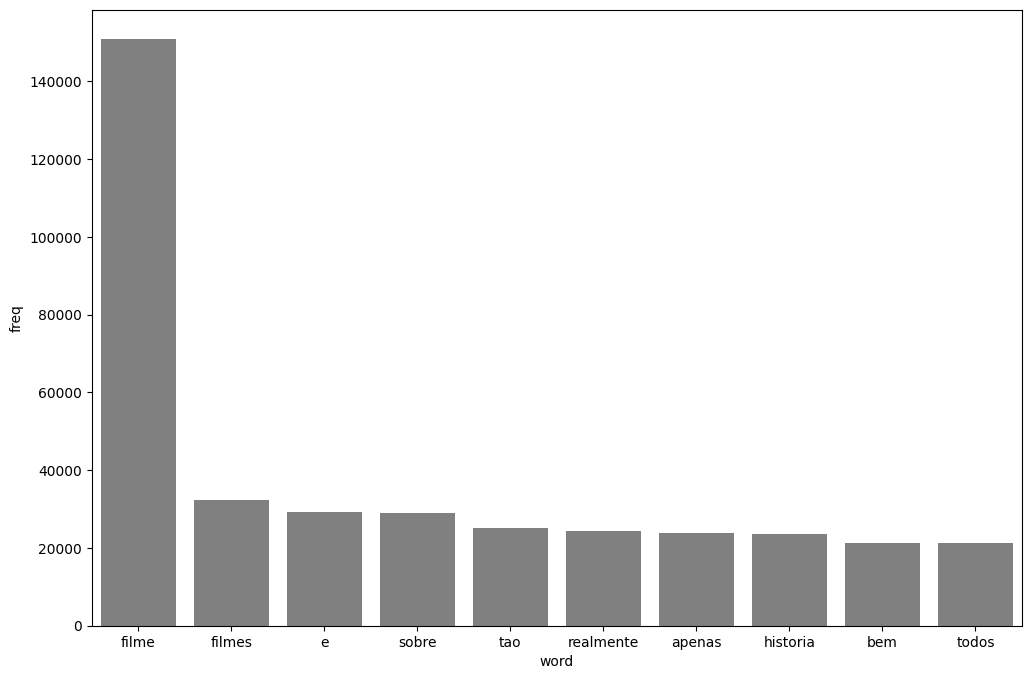

In [29]:
all_words_view(data,'treatment_4',10)

The next step will be removing the (s) from the plural words and converting all words to their basic form (common radical). This kind of processing is based on a Stemmer and in Portuguese the Stemmer will be RSLP, which translates to Portuguese language suffix remover.

# Treatment 5: Stemming words

In [30]:
stemmer = nltk.RSLPStemmer()
data['treatment_5'] = data['treatment_4'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
acc_5 = text_classifier(data, 'treatment_5', 'new_sentiment')
print(f'Baseline ACC = {acc_baseline}\n',
      f'ACC from treatment 1={acc_1}\n',
      f'ACC from treatment 2={acc_2}\n',
      f'ACC from treatment 3={acc_3}\n',
      f'ACC from treatment 4={acc_4}\n',
      f'ACC from treatment 5={acc_5}\n')

Baseline ACC = 65.83097452486858
 ACC from treatment 1=68.81520420541852
 ACC from treatment 2=68.79094217549535
 ACC from treatment 3=68.75859280226445
 ACC from treatment 4=66.32430246663971
 ACC from treatment 5=67.69106348564496



Now an improvement without removing words. Now one will apply a different way to form the bag of words. This will allow one to better count the data and as an improvement, one will get the most frequent terms. This kind of treatment is called vectorization by TF-IDF normalization. TF-IDF ponders each word based on the frequency they appear in the dataset and the size of the string they are.

# Treatment 6: TF-IDF normalization

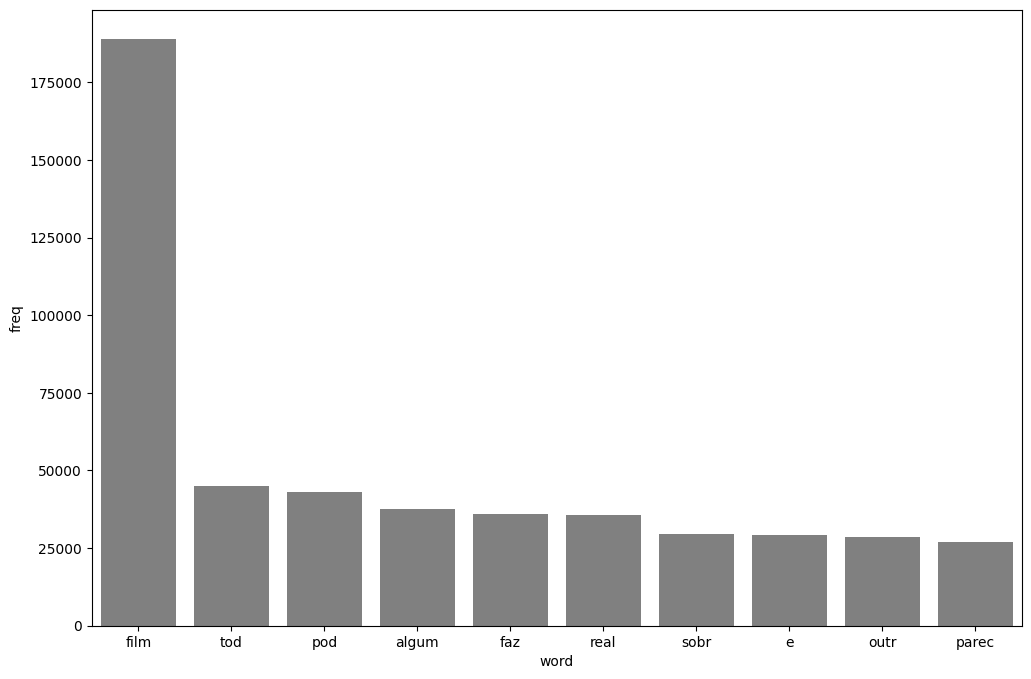

In [31]:
all_words_view(data, 'treatment_5', 10)

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
example = ['The machines are good', 'The machines are bad']
tfidf = TfidfVectorizer(lowercase=False, max_features=50)
ponders = tfidf.fit_transform(example)
#converting the data to a normal matrice
pd.DataFrame(ponders.todense(), columns=tfidf.get_feature_names_out())


,The,are,bad,good,machines
0,0.448321,0.448321,0.000000,0.630099,0.448321
1,0.448321,0.448321,0.630099,0.000000,0.448321


The TF-IDF pondered higher the words that were not found in the phrase. This will also happen to all the comments in the dataset, making the classification of the most important words better.

In [33]:
tfidf_raw = tfidf.fit_transform(data['text_pt'])
train, test, class_train, class_test = train_test_split(tfidf_raw,
                                                        data['new_sentiment'],
                                                        random_state=42)
logreg = LogisticRegression()
logreg.fit(train, class_train)
tfidf_acc_6_raw= logreg.score(test, class_test)*100

tfidf_raw = tfidf.fit_transform(data['treatment_5'])
train, test, class_train, class_test = train_test_split(tfidf_raw,
                                                        data['new_sentiment'],
                                                        random_state=42)
logreg = LogisticRegression()
logreg.fit(train, class_train)
tfidf_acc_6= logreg.score(test, class_test)*100

print(f'Baseline ACC = {acc_baseline}\n',
      f'ACC from treatment 1={acc_1}\n',
      f'ACC from treatment 2={acc_2}\n',
      f'ACC from treatment 3={acc_3}\n',
      f'ACC from treatment 4={acc_4}\n',
      f'ACC from treatment 5={acc_5}\n',
      f'TF-IDF ACC from treatment 6 raw={tfidf_acc_6_raw}\n',
      f'TF-IDF ACC from treatment 6={tfidf_acc_6}')

Baseline ACC = 65.83097452486858
 ACC from treatment 1=68.81520420541852
 ACC from treatment 2=68.79094217549535
 ACC from treatment 3=68.75859280226445
 ACC from treatment 4=66.32430246663971
 ACC from treatment 5=67.69106348564496
 TF-IDF ACC from treatment 6 raw=66.0088960776385
 TF-IDF ACC from treatment 6=67.78811160533765


Based only on treatment 6 using raw data, the TF-IDF normalization result was slightly better than the baseline. Even increasing the ACC values from treatment 5, treatment 6 was not better than treatment 1 which removed some words. This is confirming what one previously stated about removing the words.

# Treatment 6.1: Using ngrams
Another way to increase the ACC is by using ngrams as a treatment. ngrams will analyze the number of word sequences that are commonly found along each other. The cost of increasing the permutation of words is memory, so ngrams is good and must be used with caution.

In [34]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1,2)) #with no limit in vector size
tfidf_t6_1 = tfidf.fit_transform(data['text_pt'])

train, test, class_train, class_test = train_test_split(tfidf_t6_1,
                                                        data['new_sentiment'],
                                                        random_state=42)
logreg = LogisticRegression()
logreg.fit(train, class_train)
ngram_acc_6_raw= logreg.score(test, class_test)*100

tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1,2)) #with no limit in vector size
tfidf_t6_1 = tfidf.fit_transform(data['treatment_5'])

train, test, class_train, class_test = train_test_split(tfidf_t6_1,
                                                        data['new_sentiment'],
                                                        random_state=42)
logreg = LogisticRegression()
logreg.fit(train, class_train)
ngram_acc_6= logreg.score(test, class_test)*100

print(f'Baseline ACC = {acc_baseline}\n',
      f'ACC from treatment 1={acc_1}\n',
      f'ACC from treatment 2={acc_2}\n',
      f'ACC from treatment 3={acc_3}\n',
      f'ACC from treatment 4={acc_4}\n',
      f'ACC from treatment 5={acc_5}\n',
      f'ACC from treatment 6 raw={tfidf_acc_6_raw}\n',
      f'ACC from treatment 6={tfidf_acc_6}\n'
      f'TF-IDF with ngrams ACC from treatment 6 raw={ngram_acc_6_raw}\n',
      f'TF-IDF with ngrams ACC from treatment 6={ngram_acc_6}')

Baseline ACC = 65.83097452486858
 ACC from treatment 1=68.81520420541852
 ACC from treatment 2=68.79094217549535
 ACC from treatment 3=68.75859280226445
 ACC from treatment 4=66.32430246663971
 ACC from treatment 5=67.69106348564496
 ACC from treatment 6 raw=66.0088960776385
 ACC from treatment 6=67.78811160533765
TF-IDF with ngrams ACC from treatment 6 raw=88.63728265264861
 TF-IDF with ngrams ACC from treatment 6=88.57258390618682


The use of ngrams was superior to any other treatment. This happens because ngrams will associate 2 words with the negative or positive comment classification. This will increase the model's capacity for classification since there are more permutations to explain the class of that word. This makes one think that 88% ACC is enough. Improvements could still be done on the hyperparameters and even on the removal of the less-weight words, based on the logistic regression coeficients.

# Conclusions
Now that one got a good ACC value, one will show the best words to be considered as positive and the most negative words. Those words are related to the pos and neg classification of the dataset.

In [45]:
coefs = pd.DataFrame(
    logreg.coef_[0].T,
    index = tfidf.get_feature_names_out()
)

coefs.nlargest(10,0)

,0
otim,9.839012
excel,8.886558
perfeit,6.863000
maravilh,6.269811
favorit,5.839512
incri,5.747562
divert,5.317955
brilh,4.817650
ador,4.571151
hoj,4.509589


In [46]:
coefs.nsmallest(10,0)

,0
ruim,-11.797159
pi,-11.465566
horri,-9.653177
terri,-8.381478
chat,-7.454964
nad,-7.368581
parec,-6.910779
nenhum,-6.248985
tent,-5.937022
mal,-5.613432
